### Import Libraries

In [38]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

### Loading and Exploring Dataset

In [39]:
image = imread("input/image.jpg")
print(image.shape)


(4032, 3024, 3)


Image Height : 4032\
Image Width : 3024

#### Visualizing the Raw Image

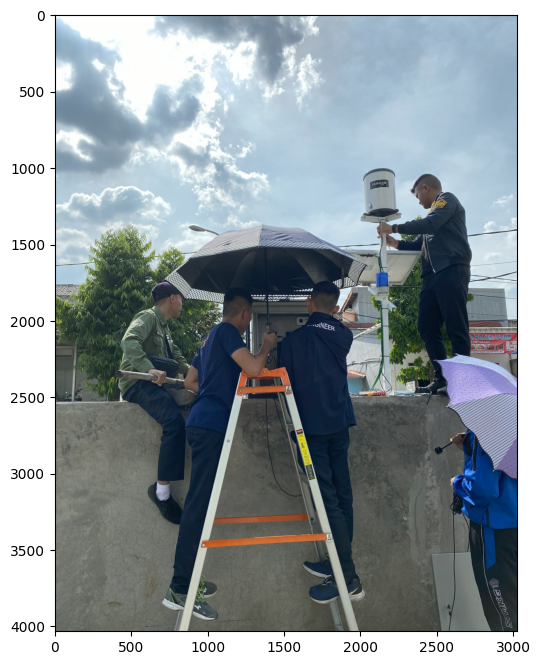

In [40]:
plt.figure(figsize=[12,8])
plt.imshow(image)

### Converting to RGB due to Efficency Processing

(4032, 3024)
1.0


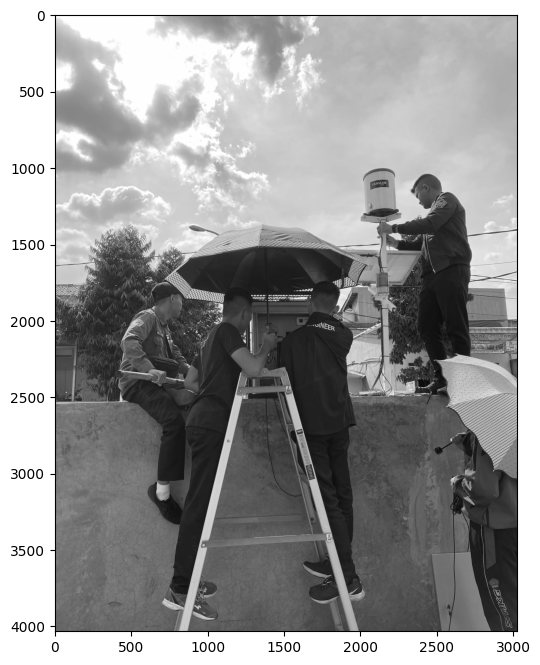

In [41]:
image_sum = image.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 52


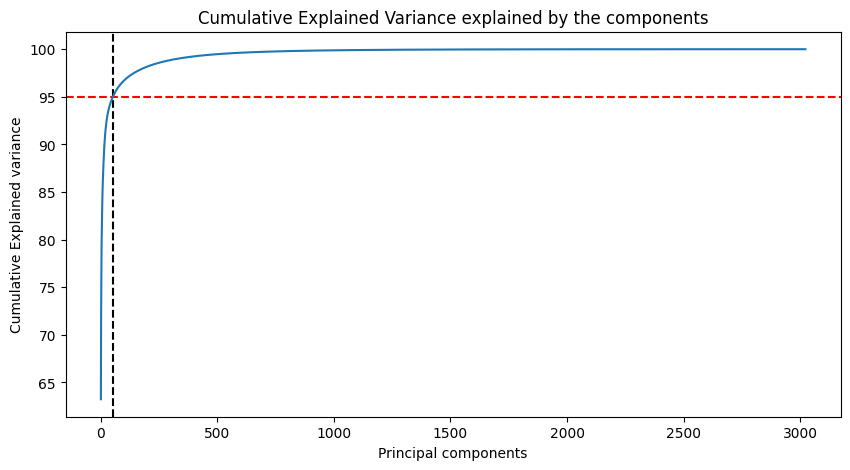

In [42]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Dari data di atas, dapat dilihat bahwa dengan menggunakan hanya 52 komponen utama (Principal Components atau PCs), kita dapat menjelaskan sebagian besar variasi dalam gambar, yang jauh lebih rendah dari jumlah piksel asli (4032 piksel).

### Reconstructing Image Using PCA

Proses rekonstruksi dimulai dengan menggunakan IncrementalPCA untuk menghasilkan 52 komponen utama dan menerapkannya pada data gambar. Kemudian, dengan menggunakan metode inverse_transform, kita merekonstruksi matriks gambar dari 52 komponen tersebut. Tujuannya adalah untuk melihat sejauh mana gambar yang direkonstruksi ini serupa dengan gambar asli. Proses ini membantu menggambarkan seberapa baik informasi dapat direduksi dengan menggunakan jumlah komponen yang lebih kecil.

In [43]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

### Visualize Compressed Image

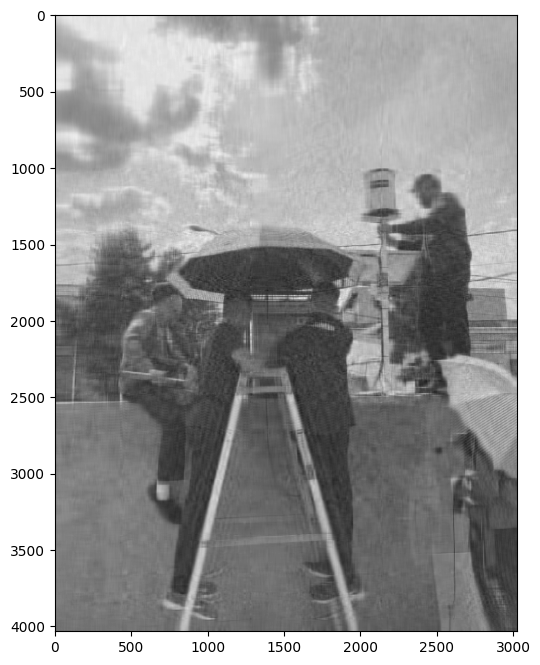

In [44]:
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Gambar di atas bisa dikatakan memiliki detail yang cukup buruk jika dibandingkan dengan gambar aslinya, namun objek utama pada gambar masih tetap dapat terlihat.

Untuk itu, gambar di atas masih bisa ditingkatkan detailnya dengan mengganti value dari variabel k

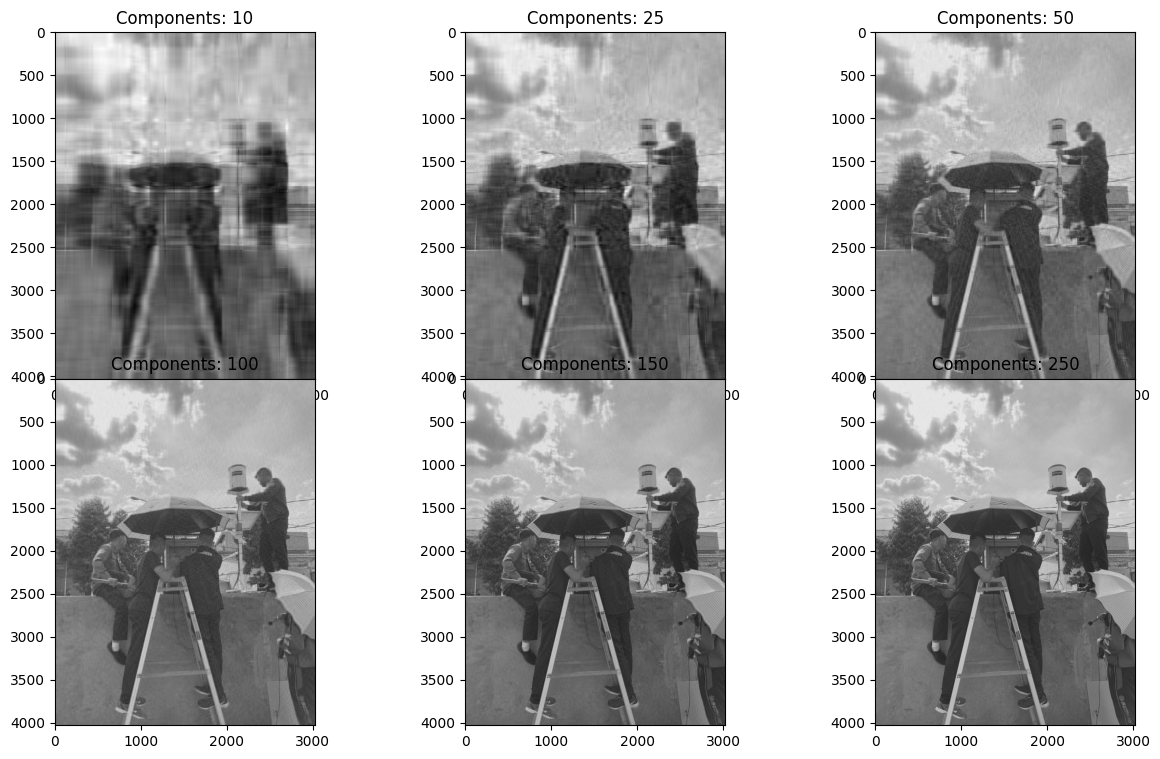

In [45]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    
ks = [10, 25, 50, 100, 150, 250]  #beberapa contoh dari implementasi penggantian value k

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

Referensi : https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example